In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [4]:
# Load the dataset
df = pd.read_csv("../data/raw/data_file.csv")


In [5]:
# Display the first few rows
df.head()



,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [6]:
# Display basic info and statistics
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [7]:
df.describe()



,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [8]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


In [9]:
# Drop any unnecessary columns (e.g., 'id' or other identifiers)
df.drop(['id'], axis=1, inplace=True)  # adjust as needed



In [10]:
# Convert date columns to datetime format (if needed)
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Replace 'date_column' with the actual column name

# Fill missing values only for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Using .loc to avoid chained assignment warnings
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


In [11]:
print(df.columns)


Index(['date', 'country', 'active', 'age', 'alco', 'ap_hi', 'ap_lo',
       'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke',
       'weight', 'disease'],
      dtype='object')


In [12]:
df.columns = df.columns.str.strip()


In [13]:
# Filter categorical columns to include only those that exist in the DataFrame
categorical_columns = [col for col in ['country', 'gender', 'occupation'] if col in df.columns]

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [14]:
# Separate features (X) and target (y)
X = df.drop('disease', axis=1)
y = df['disease']

# Identify categorical and datetime columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
datetime_columns = X.select_dtypes(include=['datetime64']).columns

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Extract features from datetime columns, if any
for col in datetime_columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X = X.drop(col, axis=1)  # Drop original datetime columns after feature extraction

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Check for missing values
missing_data = X.isnull().sum()
missing_data_percentage = (missing_data / len(X)) * 100
print(missing_data_percentage[missing_data_percentage > 0])


date_year     60.35
date_month    60.35
date_day      60.35
dtype: float64


In [16]:
# Summary statistics
print(X.describe())


             active           age          alco         ap_hi         ap_lo  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.803729  19468.865814      0.053771    128.817286     96.630414   
std        0.397179   2467.251667      0.225568    154.011419    188.472530   
min        0.000000  10798.000000      0.000000   -150.000000    -70.000000   
25%        1.000000  17664.000000      0.000000    120.000000     80.000000   
50%        1.000000  19703.000000      0.000000    120.000000     80.000000   
75%        1.000000  21327.000000      0.000000    140.000000     90.000000   
max        1.000000  23713.000000      1.000000  16020.000000  11000.000000   

        cholesterol          gluc        height         smoke        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       1.366871      1.226457    164.359229      0.088129     74.205690   
std        0.680250      0.572270      8.210126    

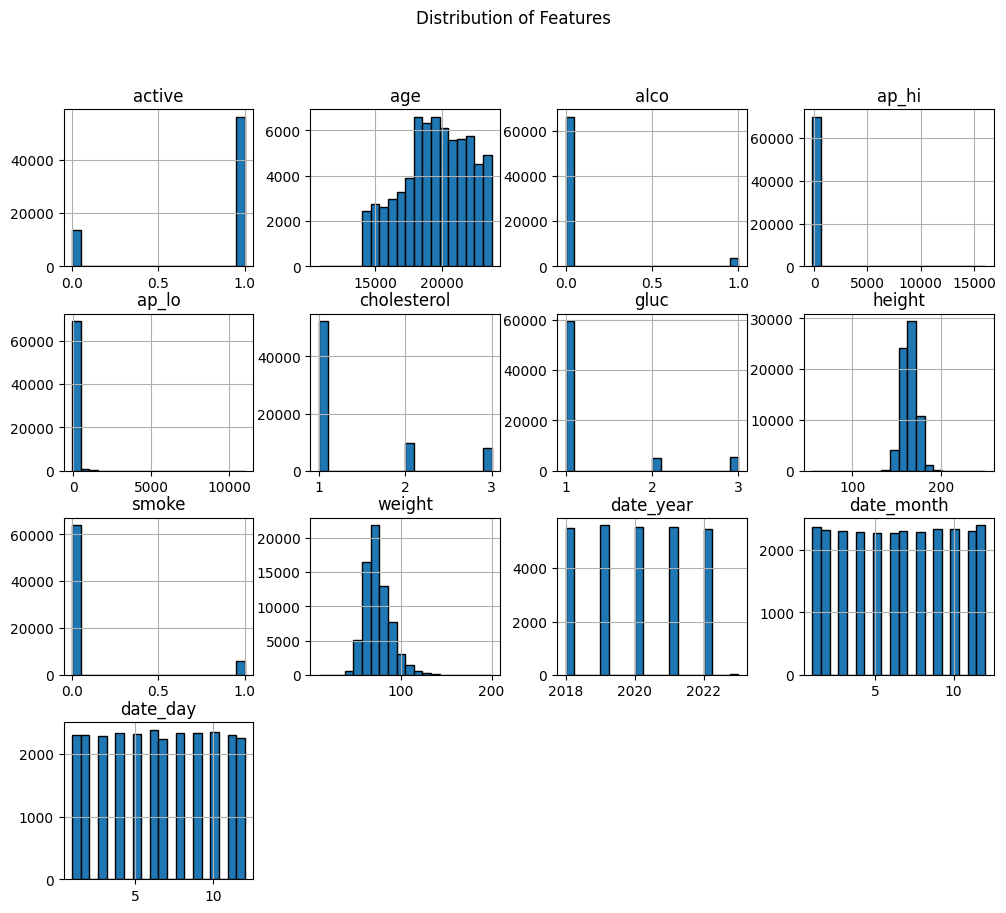

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric features
X.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Features')
plt.show()


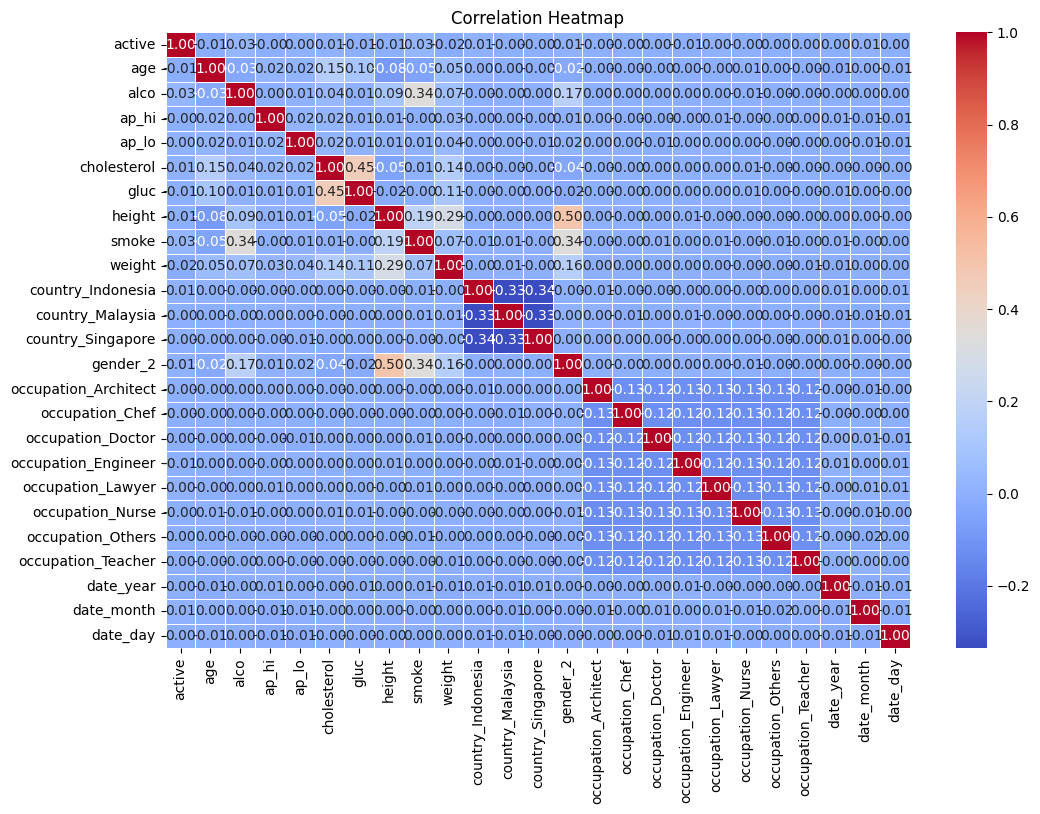

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x1000 with 0 Axes>

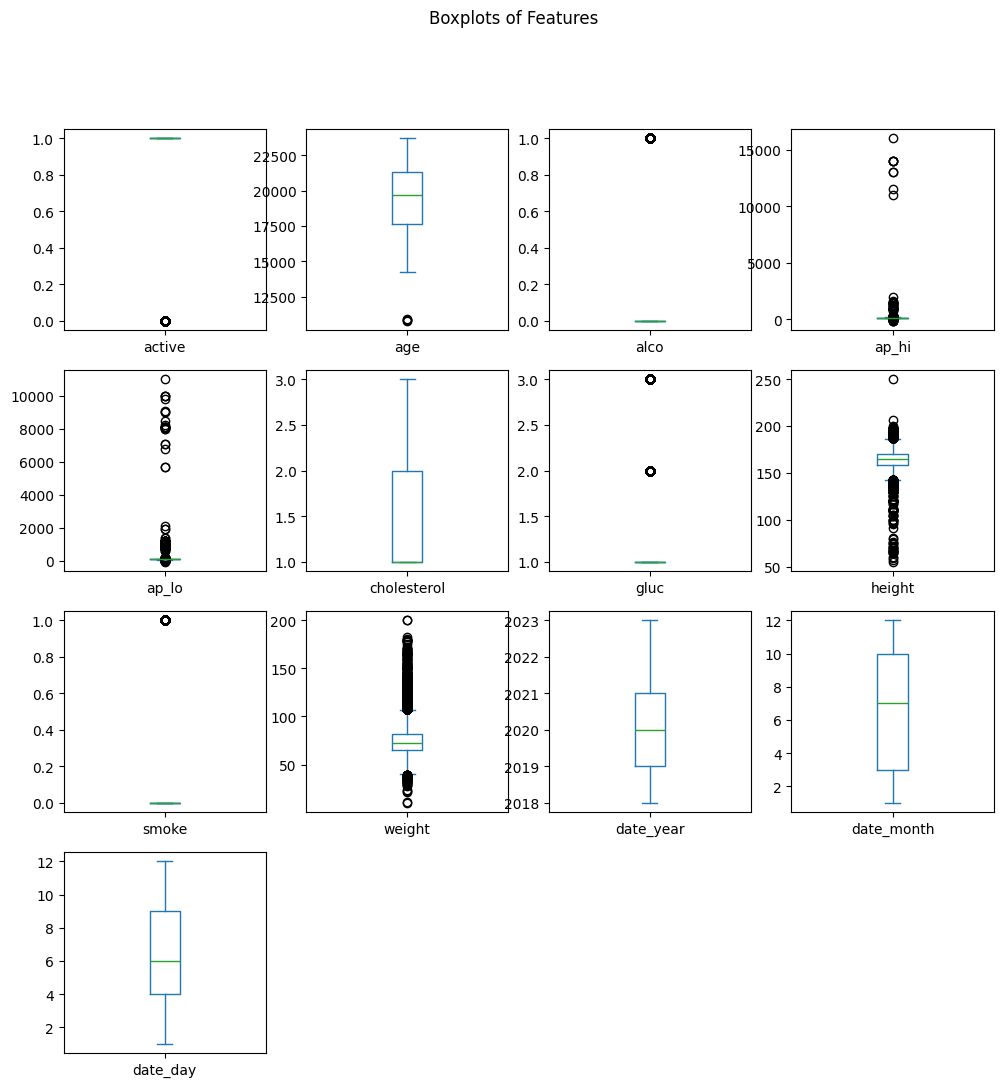

In [19]:
# Boxplots for numerical features
plt.figure(figsize=(12, 10))
X.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.suptitle('Boxplots of Features')
plt.show()


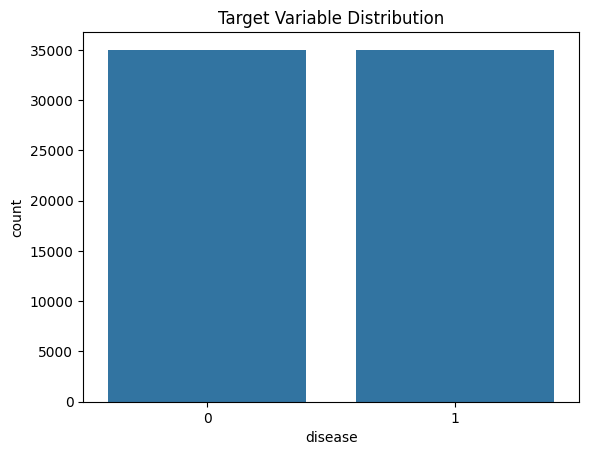

In [20]:
# Plot distribution of the target variable
sns.countplot(x=y)
plt.title('Target Variable Distribution')
plt.show()


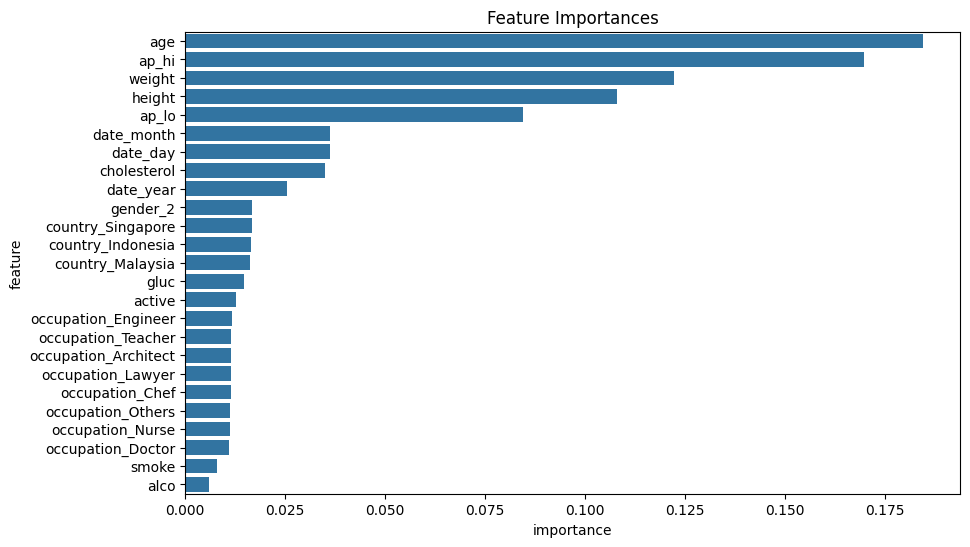

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [22]:
# Check for missing values in the training set after scaling
missing_values_train = pd.DataFrame(X_train).isnull().sum()
print(missing_values_train[missing_values_train > 0])



22    33794
23    33794
24    33794
dtype: int64


In [23]:
from sklearn.impute import SimpleImputer
# Apply median imputation to handle missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [24]:
# Apply mode imputation to handle missing values for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print metrics
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}")
print(f"Random Forest - Recall: {rf_recall:.4f}")
print(f"Random Forest - F1-Score: {rf_f1:.4f}")


Random Forest - Accuracy: 0.7307
Random Forest - Precision: 0.7465
Random Forest - Recall: 0.7001
Random Forest - F1-Score: 0.7225


In [26]:
import xgboost as xgb

# Train XGBoost model
xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgboost.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

# Print metrics
print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost - Precision: {xgb_precision:.4f}")
print(f"XGBoost - Recall: {xgb_recall:.4f}")
print(f"XGBoost - F1-Score: {xgb_f1:.4f}")


XGBoost - Accuracy: 0.7355
XGBoost - Precision: 0.7547
XGBoost - Recall: 0.6991
XGBoost - F1-Score: 0.7258


In [27]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Print metrics
print(f"AdaBoost - Accuracy: {ada_accuracy:.4f}")
print(f"AdaBoost - Precision: {ada_precision:.4f}")
print(f"AdaBoost - Recall: {ada_recall:.4f}")
print(f"AdaBoost - F1-Score: {ada_f1:.4f}")


c:\Users\MUSTAKIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.7359
AdaBoost - Precision: 0.7724
AdaBoost - Recall: 0.6700
AdaBoost - F1-Score: 0.7176


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

# Print metrics
print(f"Logistic Regression - Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression - Precision: {logreg_precision:.4f}")
print(f"Logistic Regression - Recall: {logreg_recall:.4f}")
print(f"Logistic Regression - F1-Score: {logreg_f1:.4f}")


Logistic Regression - Accuracy: 0.7215
Logistic Regression - Precision: 0.7431
Logistic Regression - Recall: 0.6786
Logistic Regression - F1-Score: 0.7094


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Print metrics
print(f"KNN - Accuracy: {knn_accuracy:.4f}")
print(f"KNN - Precision: {knn_precision:.4f}")
print(f"KNN - Recall: {knn_recall:.4f}")
print(f"KNN - F1-Score: {knn_f1:.4f}")


KNN - Accuracy: 0.5999
KNN - Precision: 0.6038
KNN - Recall: 0.5847
KNN - F1-Score: 0.5941


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Print metrics
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree - Precision: {dt_precision:.4f}")
print(f"Decision Tree - Recall: {dt_recall:.4f}")
print(f"Decision Tree - F1-Score: {dt_f1:.4f}")


Decision Tree - Accuracy: 0.6321
Decision Tree - Precision: 0.6335
Decision Tree - Recall: 0.6302
Decision Tree - F1-Score: 0.6318


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Print metrics
print(f"Gradient Boosting - Accuracy: {gb_accuracy:.4f}")
print(f"Gradient Boosting - Precision: {gb_precision:.4f}")
print(f"Gradient Boosting - Recall: {gb_recall:.4f}")
print(f"Gradient Boosting - F1-Score: {gb_f1:.4f}")


Gradient Boosting - Accuracy: 0.7388
Gradient Boosting - Precision: 0.7534
Gradient Boosting - Recall: 0.7114
Gradient Boosting - F1-Score: 0.7318


In [32]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Print metrics
print(f"SVM - Accuracy: {svm_accuracy:.4f}")
print(f"SVM - Precision: {svm_precision:.4f}")
print(f"SVM - Recall: {svm_recall:.4f}")
print(f"SVM - F1-Score: {svm_f1:.4f}")


SVM - Accuracy: 0.7204
SVM - Precision: 0.7401
SVM - Recall: 0.6807
SVM - F1-Score: 0.7092


In [33]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Print metrics
print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes - Precision: {nb_precision:.4f}")
print(f"Naive Bayes - Recall: {nb_recall:.4f}")
print(f"Naive Bayes - F1-Score: {nb_f1:.4f}")


Naive Bayes - Accuracy: 0.5946
Naive Bayes - Precision: 0.7130
Naive Bayes - Recall: 0.3189
Naive Bayes - F1-Score: 0.4407


In [34]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'KNN', 
              'Gradient Boosting', 'XGBoost', 'Naive Bayes', 'AdaBoost'],
    'Accuracy': [logreg_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, knn_accuracy, 
                 gb_accuracy, xgb_accuracy, nb_accuracy, ada_accuracy],
    'Precision': [logreg_precision, dt_precision, svm_precision, rf_precision, knn_precision, 
                  gb_precision, xgb_precision, nb_precision, ada_precision],
    'Recall': [logreg_recall, dt_recall, svm_recall, rf_recall, knn_recall, 
               gb_recall, xgb_recall, nb_recall, ada_recall],
    'F1-Score': [logreg_f1, dt_f1, svm_f1, rf_f1, knn_f1, 
                 gb_f1, xgb_f1, nb_f1, ada_f1]
})

# Display the comparison
metrics_df = metrics_df.set_index('Model')
print(metrics_df)


                     Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.721500   0.743089  0.678551  0.709355
Decision Tree        0.632143   0.633458  0.630205  0.631827
SVM                  0.720357   0.740115  0.680690  0.709160
Random Forest        0.730714   0.746502  0.700086  0.722549
KNN                  0.599857   0.603829  0.584712  0.594117
Gradient Boosting    0.738786   0.753361  0.711352  0.731754
XGBoost              0.735500   0.754734  0.699087  0.725846
Naive Bayes          0.594571   0.713010  0.318882  0.440678
AdaBoost             0.735857   0.772443  0.669994  0.717581


In [35]:
# Train the final model (using the best model, e.g., RandomForest, if chosen)
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Save the trained model
import joblib
joblib.dump(final_model, '../models/heart_disease_model.pkl')


FileNotFoundError: [Errno 2] No such file or directory: '../models/heart_disease_model.pkl'